In [1]:
import sys
sys.path.insert(0, '/home/niell_lab/Documents/github/FreelyMovingEphys/')
import pandas as pd
import xarray as xr
from utils.format_data import *
from utils.paths import find
import matplotlib.pyplot as plt
from project_analysis.object_avoidance.oa_utils import *
from utils.time import open_time

In [2]:
df = pd.read_hdf('/home/niell_lab/data/object_avoidance/recordings/090921/G6CK3LT/oa/G6CK3LT_090921_oa.h5')

In [5]:
def get_head_angle(df):
    for ind, row in df.iterrows():
        leftear_x = row['leftear_x_cm']
        leftear_y = row['leftear_y_cm']
        rightear_x = row['rightear_x_cm']
        rightear_y = row['rightear_y_cm']
        nose_x = row['nose_x_cm']
        nose_y = row['nose_y_cm']
        angs = []
        for step in range(len(leftear_x)):
            ang = np.arctan2(np.mean([leftear_y[step],rightear_y[step]])-nose_y[step],np.mean([leftear_x[step],rightear_x[step]])-nose_x[step])
            angs.append(ang)
        df.at[ind, 'head_angle'] = np.array(angs).astype(object)
    return df

In [6]:
df2 = get_head_angle(df)
df2['head_angle']

2      [-0.1637574566082481, -0.1706875222899412, -0....
3      [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
4      [-0.3967255648333528, -0.26741613176982015, -0...
5      [2.9505350586816457, 3.003417776783562, nan, n...
6      [-0.3809451628750496, -0.410624319964813, -0.3...
                             ...                        
116    [-0.14307806006664436, -0.17707296967135858, -...
117    [2.8545421932284913, 2.7892271554421866, 2.767...
118    [-0.37406202423782337, -0.3808860217977883, -0...
119    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
121    [2.8147079755144357, 2.80589749509767, 2.87260...
Name: head_angle, Length: 114, dtype: object

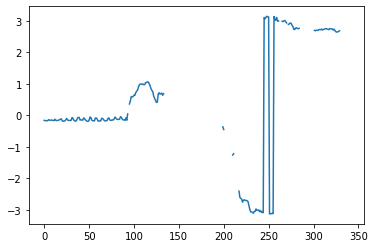

In [7]:
plt.plot(df2['head_angle'].iloc[0])

In [ ]:
plt.plot(df['head_angle'].iloc[3])

In [ ]:
trial_path = '/home/niell_lab/data/object_avoidance/recordings/090921/G6CK3LT/oa/'

In [ ]:
vid_savepath = '/home/niell_lab/Desktop/test.avi'
vid_path = '/home/niell_lab/data/object_avoidance/recordings/090921/G6CK3LT/oa/090921_G6CK3LT_control_Rig2_oa_top1.avi'
time_path = '/home/niell_lab/data/object_avoidance/recordings/090921/G6CK3LT/oa/090921_G6CK3LT_control_Rig2_oa_top1_BonsaiTS.csv'

In [ ]:
vid_arr = format_frames_oa(vid_path)

In [ ]:
plot_all_trials(vid_arr, open_time(time_path), df, vid_savepath)

In [ ]:
plot_frame(vid_arr, open_time(time_path), df, 2500, return_as_array=False)